# 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [1]:
import os, shutil

In [2]:
original_dataset_dir = 'D:/jupyter_proj/케라스 창시자에게 배우는 딥러닝/합성곱 신경망/datasets/train/cats_and_dogs'
# 원본 데이터셋을 압축해제한 디렉토리 경로

In [3]:
base_dir = 'D:/jupyter_proj/케라스 창시자에게 배우는 딥러닝/합성곱 신경망/datasets/train/cats_and_dogs_small'
os.mkdir(base_dir)
# 소규모 데이터셋을 저장할 디렉토리

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
# 훈련, 검증, 테스트 분할을 위한 디렉토리

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# 훈련용 고양이 사진 디렉토리

In [6]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
# 훈련용 강아지 사진 디렉토리

In [7]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
# 검증용 고양이 사진 디렉토리

In [8]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
# 검증용 강아지 사진 디렉토리

In [9]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
# 테스트용 고양이 사진 디렉토리

In [10]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
# 테스트용 강아지 사진 디렉토리

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사한다.

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# 다음 500개의 고양이 이미지를 validation_cats_dir에 복사한다.

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
# 다음 500개의 고양이 이미지를  test_cats_dir에 복사한다.

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# 처음 1000개의 고양이 이미지를 train_dogs_dir에 복사한다.

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# 다음 500개의 고양이 이미지를 validation_dogs_dir에 복사한다.

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
# 다음 500개의 고양이 이미지를  test_dogs_dir에 복사한다.

In [17]:
# 복사가 잘 되었는지 확인
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500


In [18]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000
검증용 강아지 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


## 네트워크 구성하기
### Conv2D(relu함수 사용)와 MaxPooling2D층을 번갈아 쌓은 컨브넷
**특성 맵의 깊이는 네트워크에서 점진적으로 증가하지만 특성 맵의 크기는 감소한다. 이는 거의 모든 컨브넷에서 볼 수 있다.**

### 소규모 컨브넷

In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

### 모델의 훈련 설정하기

In [21]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### 데이터 전처리
> 데이터는 네트워크에 주입되기 전에 부동 소수 타입의 센서로 적절하게 전처리되어 있어야 한다. JPEG파일의 전처리는 이렇게 하면 된다.
* 사진파일을 읽는다.
* JPEG 콘텐츠를 RGB 픽셀 값으로 인코딩한다.
* 그다음 부동 소수 타입의 텐서로 변환한다.
* 픽셀값(0에서 255사이)의 스케일을 [0, 1]사이로 조정한다.(신경망은 작은 입력값을 좋아한다..)

> #### 케라스에는 이런 단계를 자동으로 처리하는 유틸리티가 있다네??
> ``` keras,preprocessing.image``` 에 이미지 처리를 위한게 있다. 특히 ```ImageDataGenerator``` 클래스는 디스크에 있는 이미지파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 준다.

### ImageDataGenerator를 사용하여 디렉토리에서 이미지 읽기

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) # 모든 이미지를 1/255로 스케일을 조정한다.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타깃 디렉터리
    target_size=(150,150), # 모든 이미지를 150 * 150으로 바꾼다.
    batch_size=20,
    class_mode='binary' # binary_crossentropy 손실함수를 사용하기 때문에 이진 레이블이 필요하다.
)

validation_generator = test_datagen.flow_from_directory (
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')   

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, label_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', label_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


### 배치 제너레이터를 사용하여 모델 훈련하기

In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 62s 618ms/step - loss: 0.6904 - acc: 0.5200 - val_loss: 0.6807 - val_acc: 0.5520
Epoch 2/30
100/100 [==============================] - 52s 523ms/step - loss: 0.6641 - acc: 0.6085 - val_loss: 0.6506 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 51s 514ms/step - loss: 0.6238 - acc: 0.6675 - val_loss: 0.6198 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 55s 554ms/step - loss: 0.5745 - acc: 0.7050 - val_loss: 0.6083 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 53s 530ms/step - loss: 0.5396 - acc: 0.7350 - val_loss: 0.6020 - val_acc: 0.6660
Epoch 6/30
100/100 [==============================] - 53s 532ms/step - loss: 0.5066 - acc: 0.7485 - val_loss: 0.6742 - val_acc: 0.6430
Epoch 7/30
100/100 [==============================] - 53s 531ms/step - loss: 0.4858 - acc: 0.7700 - val_loss: 0.55

### 모델 저장하기

In [29]:
model.save('cats_and_dogs_small_1.h5')

### 훈련의 정확도와 손실 그래프 그리기

### ImageDataGenerator를 사용하여 데이터 증식 설정하기

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') # 검증 정확도
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

* ```rotation_range```는 랜덤하게 사진을 회전시킬 각도 범위이다(0~180 사이).
* ```width_shift_range```와 ```height_shift_range```는 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위이다(전체 너비와 높이에 대한 비율).
* ```shear_range```는 랜덤하게 전단 변환을 적용할 각도 범위이다.
> 전단 변환이란 y축 방향으로 각도를 증가시켜 이미지를 변형시키는 것이다.
* ```zoom_range```는 랜덤하게 사진을 확대할 범위이다.
> 확대 비율의 범위를 리스트로 전달할 수도 있다[최소, 최대].
* ```horizontal_flip```은 랜덤하게 이미지를 수평으로 뒤집는다. 수평 대칭을 가정할 수 있을 때 사용한다(인물사진, 풍경사진).
* ```fill_mode```는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야할 픽셀을 채울 전략이다.
> nearest는 인접한 픽셀을 사용하고, constant는 cval 매개변수의 값을 사용한다.

### 랜덤하게 증식된 훈련 이미지 그리기

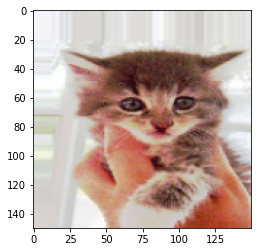

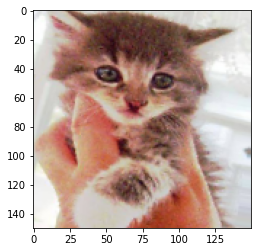

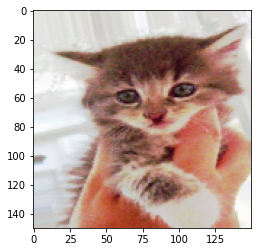

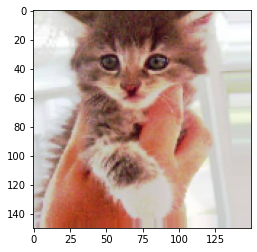

In [26]:
from keras.preprocessing import image # 이미지 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지 선택

img = image.load_img(img_path, target_size=(150, 150)) # 이미지를 읽고 크기를 변경한다.

x = image.img_to_array(img) # (150, 150, 3) 크기의 넘파이 배열로 변환한다.
x = x.reshape((1,)+x.shape) # (1, 150, 150, 3)크기로 변환한다.
# 그 이유는 flow메서드가 배치 데이터를 기대하기 때문에 배치차원을 추가하는 것이다.

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i  % 4 == 0:
        break
    plt.show()
    # 랜덤하게 생성된 이미지 배치를 생성한다.

#### 데이터 증식을 사용하여 네트워크를 훈련시킬 때 새로운 정보를 만들어 낼 수 없고 단지 기본 정보의 재조합만 가능하기 때문에 과대적합을 완전히 제거하기에 충분하지 않을 수 있다!!!! 그렇기에 dropout을 추가한다.

### 드롭아웃을 포함한 새로운 컨브넷 정의

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1.255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되서는 안된다. 테스트 세트도 마찬가지이다.

train_generator = train_datagen.flow_from_directory(
    train_dir, # 타깃 디렉터리
    target_size=(150, 150), # 모든 이미지를 150 * 150으로 바꾼다.
    batch_size=32, 
    class_mode = 'binary' # 크로스엔트로피 손실함수를 사용하기 때문에 이진 레이블을 만들어야 한다.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # 타깃 디렉터리
    target_size=(150, 150), # 모든 이미지를 150 * 150으로 바꾼다.
    batch_size=32, 
    class_mode = 'binary' # 크로스엔트로피 손실함수를 사용하기 때문에 이진 레이블을 만들어야 한다.
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 116s 1s/step - loss: 4.0485 - acc: 0.5196 - val_loss: 0.6921 - val_acc: 0.4962
Epoch 2/30
100/100 [==============================] - 100s 1s/step - loss: 0.7498 - acc: 0.5201 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 90s 898ms/step - loss: 0.7064 - acc: 0.5543 - val_loss: 0.6862 - val_acc: 0.5108
Epoch 4/30
100/100 [==============================] - 87s 873ms/step - loss: 0.6948 - acc: 0.5505 - val_loss: 0.6928 - val_acc: 0.5026
Epoch 5/30
100/100 [==============================] - 86s 863ms/step - loss: 0.6855 - acc: 0.5685 - val_loss: 0.6941 - val_acc: 0.4918
Epoch 6/30
100/100 [==============================] - 94s 944ms/step - loss: 0.6842 - acc: 0.5744 - val_loss: 0.6895 - val_acc: 0.4994
Epoch 7/30
100/100 [==============================] - 93s 931ms/step - loss: 0.6758 - acc: 0.5865 - val_loss: 